In [1]:
import sys
sys.path.insert(0, '../../src')

import numpy as np
import matplotlib.pyplot as plt

from node import *
from ntree import *
from tree_vis import *


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

RESOLUTION = 10000
TREE_SIZE = 1023


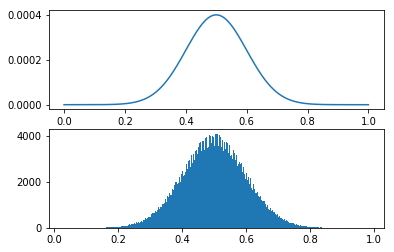

In [2]:
xs = np.linspace(0, 1, RESOLUTION)

pdf = np.array(list(gaussian(i, mu=0.5, sig=0.1) for i in xs))
pdf = pdf / np.sum(pdf)
samples = np.random.choice(xs, RESOLUTION*100, p=pdf)

plt.subplot(211)
plt.plot(xs, pdf)
plt.subplot(212)
plt.hist(samples, bins=int(RESOLUTION/10))
plt.show()

## Direct

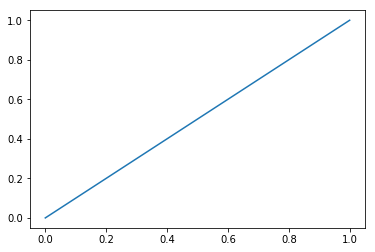

In [3]:
error = np.vectorize(lambda x: x)(xs)
plt.plot(xs, error)
plt.show()

In [4]:
tree = Tree(1, TREE_SIZE)

tree.adapt_to_samples(samples)

tree.plot(plot_density_flag=True)

Adaption begun, 1000000 samples, max iterations 10
Iteration 0 , adapted: False


KeyboardInterrupt: 

## square root

In [ ]:
error = np.vectorize(lambda x: np.sqrt(x))(xs)
plt.plot(xs, error)
plt.show()

In [ ]:
tree = Tree(1, TREE_SIZE, error_function='sqrt')

tree.adapt_to_samples(samples)

tree.plot(plot_density_flag=True)

## square

In [ ]:
error = np.vectorize(lambda x: x**2)(xs)
plt.plot(xs, error)
plt.show()

In [ ]:
tree = Tree(1, TREE_SIZE, error_function='square')

tree.adapt_to_samples(samples)

tree.plot(plot_density_flag=True)

## cubic

In [ ]:
error = np.vectorize(lambda x: x**3)(xs)
plt.plot(xs, error)
plt.show()

In [ ]:
tree = Tree(1, TREE_SIZE, error_function=lambda x: x**3)

tree.adapt_to_samples(samples)

tree.plot(plot_density_flag=True)